In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
plt.style.use("seaborn")

In [50]:
#Generating scatter plot of X's 1st and X's 2nd coloumn values
def scatter_gen(X,Y,query_x):
#     print(X[:,0])
    print(X[:,1])
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.scatter(query_x[0],query_x[1],color="red")
    plt.show()

In [30]:
#Euclideian distance bewtween point xi=[x1,x2,x3,....xi] and point yi=[y1,y2,y3.....yi]
def dist(x,y):
    return np.sqrt(sum((x-y)**2))

In [31]:
#X and Y are 2-D numpy array
def knn_algorithm(X,Y,query_x,k=5):
    vals=[]
    rows=X.shape[0] #Tells Number Of Rows
    
    for i in range(rows):
        d=dist(X[i],query_x)
        vals.append((d,Y[i]))
    
    #Sorting  2-D numpy array 'vals'
    vals=sorted(vals)
    
    #Considering only top k values through slicing...(0 to k-1)
    vals=vals[:k]
         
    #Converting into 1-D np-array for further calculation...List --? 1-D numpy array
    vals=np.array(vals)
    
    #Producing counts of each possible classes
    vals=np.unique(vals[:,1:],return_counts=True)
    
    #Finding index of maximum counts
    index=vals[1].argmax()
    
#     print(vals)
    
    #returning predicted nearest class of query_x
    return vals[0][index]

[ 3.71975047  3.41437943  3.04724443  3.13867678  3.61985805  4.59164128
  3.39835595  4.04396943  4.95114323  4.90239967  3.91445026  5.06896877
  3.66529487  4.77256166  3.79730296  4.73262822  3.43648588  2.94851846
  3.6488889   4.13447274  4.43875703  4.02119623  4.03477733  4.31174386
  2.54939222  4.33673035  5.63946256  3.0156258   4.12508079  2.49239435
  5.03815425  5.29511732  3.37368252  3.83263367  4.13833792  3.24528272
  3.35192483  3.69712075  3.32335845  3.97815432  3.43911347  3.40153958
  1.97043755  2.76019051  4.70994226  5.14262008  4.13744089  4.90779038
  1.89395445  4.64044625  4.57068586  3.82770824  3.91087375  3.23995077
  3.8340588   5.1822002   4.52288264  3.646189    4.72790838  2.47311439
  4.2486247   4.8051259   3.74614171  4.33027249  3.07947486  4.77655656
  5.83065929  3.30050546  4.0591948   4.64349128  2.95689444  2.65347184
  3.62006999  2.87160599  4.61927152  4.07355771  5.63827035  3.42317721
  3.16695962  4.69791807  3.35591376  3.46930694  2

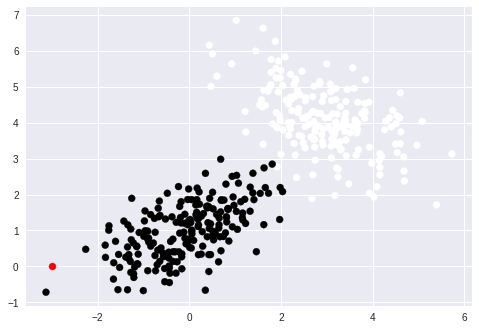

In [51]:
dfx=pd.read_csv("xdata.csv")
dfy=pd.read_csv("ydata.csv")
# print(dfx.head())
# print(dfy.head())


#Changing from pandas to numpy array using X=df.values, X->2-D numpy array
X=dfx.values
# print(type(X))
# print(X)

Y=dfy.values
# print(type(Y))
# print(Y)

#Dropping 1st coloumn of both X and Y as it was for indexing only
X=X[:,1:]
Y=Y[:,1:]

#Converting Y into single vector column
Y=np.squeeze(Y) 
# or use this , Y=Y[:,1:].reshape((-1,))

#Genrating random 2-D points for our query_x
query_x=np.random.randint(-4,4,size=(1,2)).reshape((-1,))
# print(query_x)

pred=knn_algorithm(X,Y,query_x)
# print(pred)

scatter_gen(X,Y,query_x)
